In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from utils import *
from Network import *

%matplotlib notebook
import matplotlib.pyplot as plt

#hyperparams
output_seq_len = 4
input_sequence_length = 5
output_seq_len = 1
dim_val = 10
dim_attn = 5
lr = 0.02
epochs = 40

n_decoder_layers = 2
n_encoder_layers = 2

batch_size = 5

#init network and optimizer
t = Transformer(dim_val, dim_attn, 1,  input_sequence_length, output_seq_len, n_decoder_layers, n_encoder_layers)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

#keep track of loss for graph
losses = []

<IPython.core.display.Javascript object>


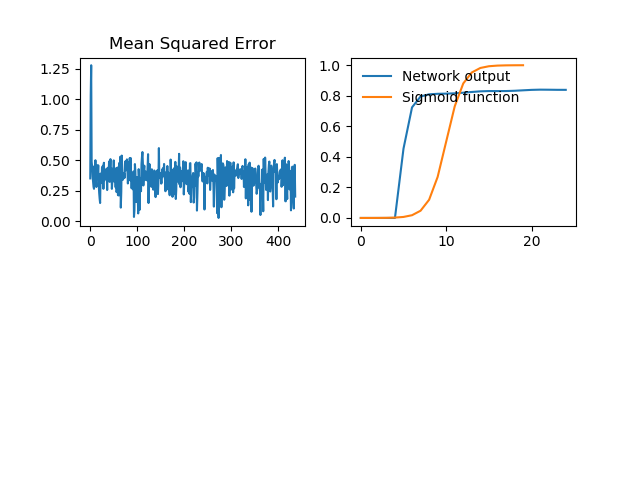

KeyboardInterrupt: 

In [2]:
#build live matplotlib fig
fig = plt.figure()

ax = fig.add_subplot(221)
ax1 =  fig.add_subplot(222)
plt.ion()

fig.show()
fig.canvas.draw()


def get_data(batch_size, input_sequence_length):
    i = input_sequence_length + 1
    #d = list(range(b, b + input_sequence_length + 1))
    
    t = torch.zeros(batch_size,1).uniform_(0,20 - i).int()
    b = torch.arange(-10, -10 + i).unsqueeze(0).repeat(batch_size,1) + t
    
    s = torch.sigmoid(b.float())
    return s[:, :input_sequence_length].unsqueeze(-1), s[:,-1]
    
for e in range(epochs):
    out = []
    
    for b in range(-10- input_sequence_length, 10 - input_sequence_length):
        optimizer.zero_grad()
        
        #format data
        #data = torch.sigmoid(torch.tensor(list(range(b, b + input_sequence_length + 1)), dtype = torch.float32))
        #X = data[:input_sequence_length].unsqueeze(1).unsqueeze(0)
        #Y = data[input_sequence_length:]
        
        X, Y = get_data(batch_size, input_sequence_length)
        #Forward pass and calculate loss
        net_out = t(X)
        loss = torch.mean(torch.abs(net_out - Y))

        #backwards pass
        loss.backward()
        optimizer.step()

        #Track losses and draw rgaph
        out.append([net_out.detach().numpy(), Y])
        losses.append(loss)

        ax.clear()
        ax.plot(losses)
        ax.set_title("Mean Squared Error")
        fig.canvas.draw()

        
        o = []
        x = [[[0]] * 5]
        
        #Draw graph comparing to sigmoid
        for i in range(-10, 10):
            o.append([torch.sigmoid(torch.tensor(i).float())])
            a = t(torch.tensor(x).float()).detach().numpy()
            x[0].append(a)
        ax1.clear()
        ax1.plot(x[0], label='Network output')
        ax1.plot(o, label='Sigmoid function')
        ax1.set_title("")
        ax1.legend(loc='upper left', frameon=False)



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

o = []
x = [[[0.5]] * 5]


for i in range(-10, 10):
    o.append([torch.sigmoid(torch.tensor(i).float())])
    a = t(torch.tensor(x).float()).detach().numpy()
    x[0].append(a)
    
ax.plot(x[0], label='Network output')
ax.plot(o, label='Sigmoid function')
ax.set_title("")
ax.legend(loc='upper left', frameon=False)
